In [405]:
import pandas as pd
import numpy as np
from meteostat import Daily, Point
from datetime import datetime
import matplotlib.pyplot as plt
import sqlite3


In [406]:
db_path = r"C:\Users\shrey\Desktop\HCLTech_hackathon\meteodb.db"
conn = sqlite3.connect(db_path)

In [407]:
tables = pd.read_sql_query(
    "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;",
    conn
)
tables

,name
0,daily_obs
1,staging_daily
2,stations


In [408]:
daily_data = pd.read_sql_query("SELECT * FROM daily_obs;", conn)
daily_data.head()


,station_id,date,tavg,tmin,tmax,prcp,snwd,wdir,wspd,wpgt,tsun,tavg_source,tmin_source,tmax_source,prcp_source,tsun_source,model_source,inserted_at
0,42265.csv,2025-07-13,27.1,24.4,31.2,NaN,None,None,12.5,None,None,metno_forecast,metno_forecast,metno_forecast,None,None,0,2025-12-12 15:20:44
1,42265.csv,2025-07-14,28.6,25.5,33.1,4.1,None,None,16.0,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44
2,42265.csv,2025-07-15,28.9,25.5,32.6,2.0,None,None,9.4,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44
3,42265.csv,2025-07-16,28.2,25.6,31.4,10.8,None,None,7.2,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44
4,42265.csv,2025-07-17,27.8,26.3,31.1,21.9,None,None,14.8,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44


In [409]:
station_data = pd.read_sql_query("SELECT * FROM stations;", conn)
station_data.head()

,station_id,name,country,region,lat,lon,elev_m,inventory,last_updated
0,42265,{'en': 'Mainpuri'},IN,UP,27.2333,79.0500,None,"{\""daily\"": {\""end\"": \""1978-03-25\"", \""start\...",2025-12-12 14:34:45
1,42459,{'en': 'Shivpuri'},IN,MP,25.3333,77.6500,None,"{\""daily\"": {\""end\"": null, \""start\"": null}, ...",2025-12-12 14:34:45
2,42782,{'en': 'Bilaspur / Bil?spur'},IN,CT,22.1000,82.1667,None,"{\""daily\"": {\""end\"": null, \""start\"": null}, ...",2025-12-12 14:34:45
3,42783,{'en': 'Champa'},IN,MP,22.0333,82.7000,None,"{\""daily\"": {\""end\"": \""1970-12-31\"", \""start\...",2025-12-12 14:34:45
4,42792,{'en': 'Sundargarh'},IN,OR,22.0167,84.0000,None,"{\""daily\"": {\""end\"": null, \""start\"": null}, ...",2025-12-12 14:34:45


In [410]:
daily = daily_data.copy()
station = station_data.copy()

In [411]:
daily.head()


,station_id,date,tavg,tmin,tmax,prcp,snwd,wdir,wspd,wpgt,tsun,tavg_source,tmin_source,tmax_source,prcp_source,tsun_source,model_source,inserted_at
0,42265.csv,2025-07-13,27.1,24.4,31.2,NaN,None,None,12.5,None,None,metno_forecast,metno_forecast,metno_forecast,None,None,0,2025-12-12 15:20:44
1,42265.csv,2025-07-14,28.6,25.5,33.1,4.1,None,None,16.0,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44
2,42265.csv,2025-07-15,28.9,25.5,32.6,2.0,None,None,9.4,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44
3,42265.csv,2025-07-16,28.2,25.6,31.4,10.8,None,None,7.2,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44
4,42265.csv,2025-07-17,27.8,26.3,31.1,21.9,None,None,14.8,None,None,metno_forecast,metno_forecast,metno_forecast,metno_forecast,None,0,2025-12-12 15:20:44


In [412]:
daily = daily.drop(
    ["snwd", "wdir", "wpgt", "tsun", "tavg_source", "tmin_source",
     "tmax_source", "prcp_source", "tsun_source", "model_source",
     "inserted_at"],
    axis=1
)


In [413]:
daily.head()

,station_id,date,tavg,tmin,tmax,prcp,wspd
0,42265.csv,2025-07-13,27.1,24.4,31.2,NaN,12.5
1,42265.csv,2025-07-14,28.6,25.5,33.1,4.1,16.0
2,42265.csv,2025-07-15,28.9,25.5,32.6,2.0,9.4
3,42265.csv,2025-07-16,28.2,25.6,31.4,10.8,7.2
4,42265.csv,2025-07-17,27.8,26.3,31.1,21.9,14.8


In [414]:
station.head()

,station_id,name,country,region,lat,lon,elev_m,inventory,last_updated
0,42265,{'en': 'Mainpuri'},IN,UP,27.2333,79.0500,None,"{\""daily\"": {\""end\"": \""1978-03-25\"", \""start\...",2025-12-12 14:34:45
1,42459,{'en': 'Shivpuri'},IN,MP,25.3333,77.6500,None,"{\""daily\"": {\""end\"": null, \""start\"": null}, ...",2025-12-12 14:34:45
2,42782,{'en': 'Bilaspur / Bil?spur'},IN,CT,22.1000,82.1667,None,"{\""daily\"": {\""end\"": null, \""start\"": null}, ...",2025-12-12 14:34:45
3,42783,{'en': 'Champa'},IN,MP,22.0333,82.7000,None,"{\""daily\"": {\""end\"": \""1970-12-31\"", \""start\...",2025-12-12 14:34:45
4,42792,{'en': 'Sundargarh'},IN,OR,22.0167,84.0000,None,"{\""daily\"": {\""end\"": null, \""start\"": null}, ...",2025-12-12 14:34:45


In [415]:
station=station.drop(
    ["country","region" ,"lat","lon","elev_m","inventory","last_updated"],
    axis=1
)

In [416]:

station['Name'] = station['name'].str.extract(r"'en':\s*'([^/']+)")


In [417]:
station.drop(["name"], axis =1, inplace=True)
station.head()

,station_id,Name
0,42265,Mainpuri
1,42459,Shivpuri
2,42782,Bilaspur
3,42783,Champa
4,42792,Sundargarh


In [418]:
daily['station_id'] = daily['station_id'].str.replace(r'\.csv$', '', regex=True)
daily.head()


,station_id,date,tavg,tmin,tmax,prcp,wspd
0,42265,2025-07-13,27.1,24.4,31.2,NaN,12.5
1,42265,2025-07-14,28.6,25.5,33.1,4.1,16.0
2,42265,2025-07-15,28.9,25.5,32.6,2.0,9.4
3,42265,2025-07-16,28.2,25.6,31.4,10.8,7.2
4,42265,2025-07-17,27.8,26.3,31.1,21.9,14.8


In [419]:
daily['date'] = pd.to_datetime(daily['date'])
daily['year']  = daily['date'].dt.year
daily['month'] = daily['date'].dt.month
daily['day']   = daily['date'].dt.day

In [420]:
station.head()



,station_id,Name
0,42265,Mainpuri
1,42459,Shivpuri
2,42782,Bilaspur
3,42783,Champa
4,42792,Sundargarh


In [421]:
df = daily.merge(station[['station_id','Name']], on='station_id', how='left')

In [422]:
df = df[df['date'].dt.year != 2020] 

In [423]:
df.head()

,station_id,date,tavg,tmin,tmax,prcp,wspd,year,month,day,Name
0,42265,2025-07-13,27.1,24.4,31.2,NaN,12.5,2025,7,13,Mainpuri
1,42265,2025-07-14,28.6,25.5,33.1,4.1,16.0,2025,7,14,Mainpuri
2,42265,2025-07-15,28.9,25.5,32.6,2.0,9.4,2025,7,15,Mainpuri
3,42265,2025-07-16,28.2,25.6,31.4,10.8,7.2,2025,7,16,Mainpuri
4,42265,2025-07-17,27.8,26.3,31.1,21.9,14.8,2025,7,17,Mainpuri


In [424]:
df.shape

(53007, 11)

In [425]:
ts = df.copy()

In [426]:
ts.isnull().sum()

station_id      0
date            0
tavg            1
tmin           36
tmax           79
prcp           55
wspd          119
year            0
month           0
day             0
Name            0
dtype: int64

In [427]:
ts['tavg'] = ts['tavg'].fillna((ts['tavg'].shift(1) + ts['tavg'].shift(-1)) / 2)
ts['prcp'] = ts['prcp'].fillna((ts['prcp'].shift(1) + ts['prcp'].shift(-1)) / 2)
ts['wspd'] = ts['wspd'].fillna((ts['wspd'].shift(1) + ts['wspd'].shift(-1)) / 2)
ts.drop(["tmin","tmax"],axis=1,inplace=True)
ts.dropna(inplace=True)

In [428]:
ts.isnull().sum()


station_id    0
date          0
tavg          0
prcp          0
wspd          0
year          0
month         0
day           0
Name          0
dtype: int64

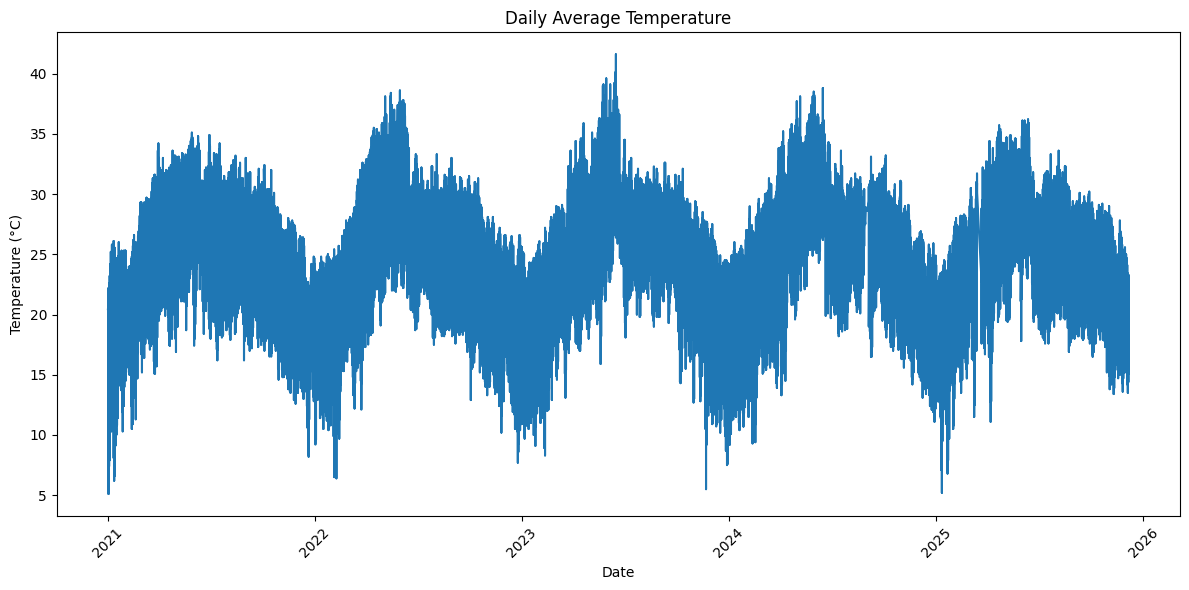

In [429]:


# Sort by date (important for time-series plots)
ts = ts.sort_values('date')

# Plot
plt.figure(figsize=(12,6))
plt.plot(ts["date"], ts["tavg"])
plt.title("Daily Average Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


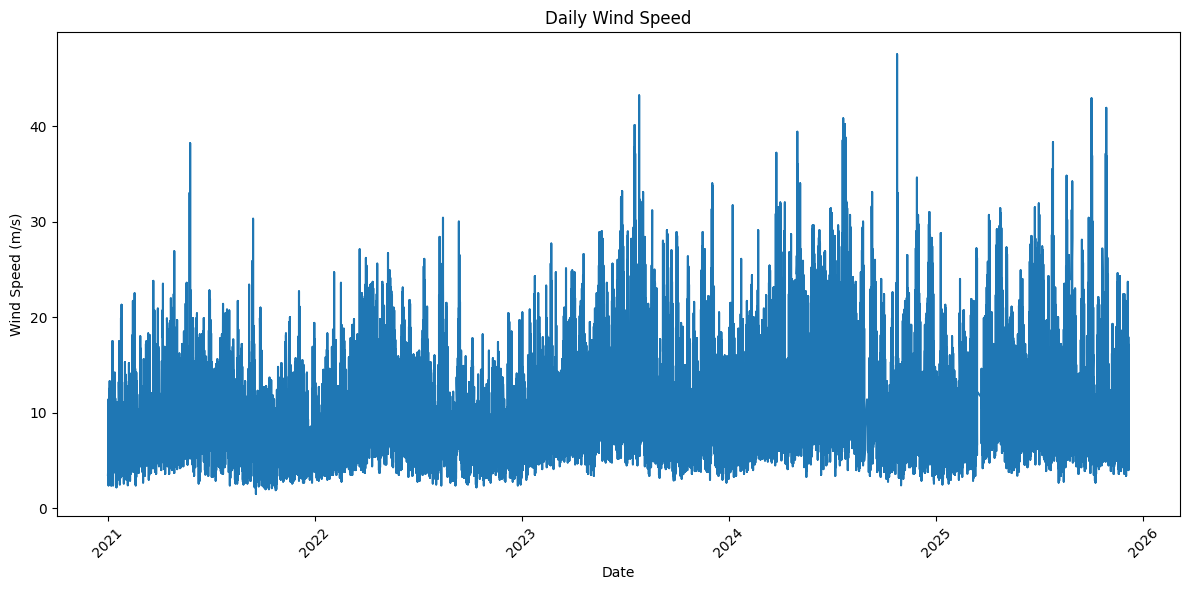

In [430]:
plt.figure(figsize=(12,6))
plt.plot(ts["date"], ts["wspd"])
plt.title("Daily Wind Speed")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")   # or (km/h) if you converted
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


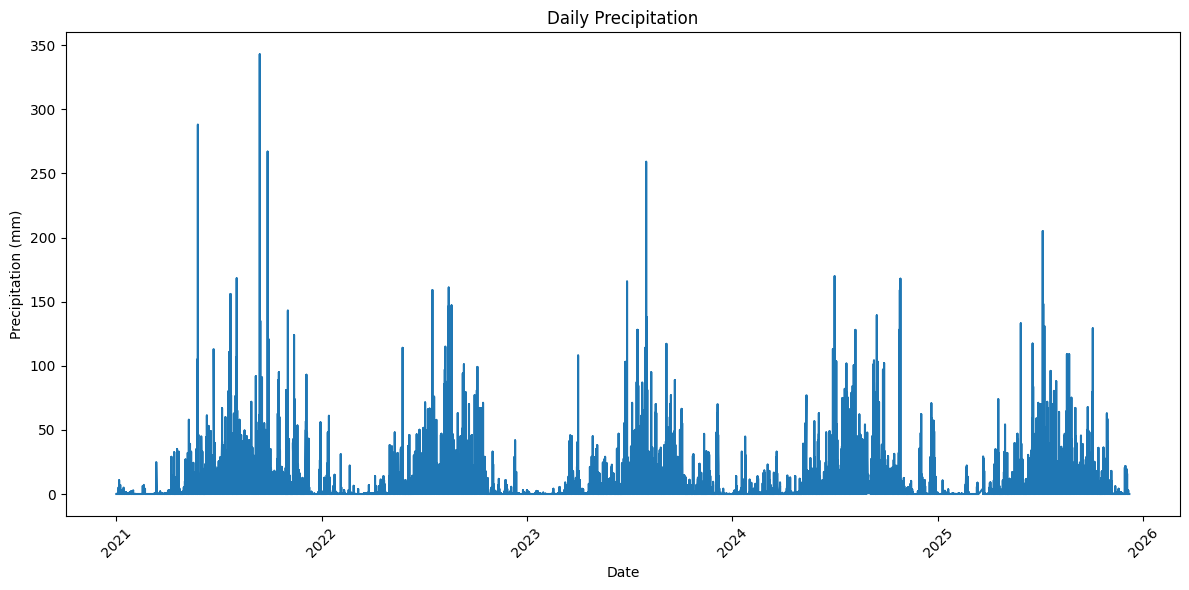

In [431]:
plt.figure(figsize=(12,6))
plt.plot(ts["date"], ts["prcp"])
plt.title("Daily Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")   # Most datasets use millimeters
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
---
---
---

In [432]:

!pip install prophet

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [447]:
import warnings
warnings.filterwarnings("ignore")


from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sqlite3
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.model_selection import train_test_split

In [434]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mape(y_true, y_pred):
    # avoid division by zero: use mask where true==0
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true == 0
    if mask.sum() > 0:
        # compute MAPE only for non-zero true values; report fraction of zeros
        mape_val = np.mean(np.abs((y_true[~mask] - y_pred[~mask]) / y_true[~mask])) * 100 if (~mask).sum() > 0 else np.nan
        return mape_val
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [435]:
ts['date'] = pd.to_datetime(ts['date'])
ts = ts.sort_values('date').reset_index(drop=True)

In [436]:
def run_forecasts(series_name,
                  df=ts,
                  test_horizon=30,
                  sarimax_order=(1,0,1),
                  sarimax_seasonal_order=(1,0,1,7),  # weekly seasonality by default
                  transform_prcp=True):
    """
    Trains Prophet and SARIMAX on `series_name` column of df.
    Returns: dictionary with trained models, evaluation on last test_horizon,
             final forecast for next test_horizon days (from models retrained on full series).
    """
    results = {}
    s = df[['date', series_name]].copy().rename(columns={'date':'ds', series_name:'y'})
    s = s.dropna().reset_index(drop=True)

    # optionally transform precipitation to stabilize variance and handle zeros
    is_prcp = (series_name.lower().startswith('prcp') or series_name.lower().startswith('prec'))
    if is_prcp and transform_prcp:
        s['y_trans'] = np.log1p(s['y'])   # log1p for zeros
        target_col = 'y_trans'
    else:
        s['y_trans'] = s['y']
        target_col = 'y_trans'

    # split train/test using last test_horizon rows
    if len(s) <= test_horizon + 10:
        raise ValueError("Series too short for chosen test_horizon. Reduce test_horizon or provide longer data.")
    train = s.iloc[:-test_horizon].copy()
    test = s.iloc[-test_horizon:].copy()

    # --------------------------
    # Prophet
    # --------------------------
    m = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    # if precipitation -> turn off changepoint prior or tweak; leave defaults for now
    # Prophet expects 'ds' and 'y' numeric; provide y_trans
    train_prophet = train[['ds', target_col]].rename(columns={target_col:'y'})
    m.fit(train_prophet)

    # forecast horizon = test_horizon
    future = m.make_future_dataframe(periods=test_horizon, freq='D')
    fc = m.predict(future)
    # pick last test_horizon rows corresponding to test period
    fc_test = fc.set_index('ds').loc[test['ds'].values]  # align by date
    prophet_pred = fc_test['yhat'].values

    # invert transform if needed
    if is_prcp and transform_prcp:
        prophet_pred_inv = np.expm1(prophet_pred)  # invert log1p
        test_y_inv = np.expm1(test[target_col].values)
    else:
        prophet_pred_inv = prophet_pred
        test_y_inv = test['y'].values

    # metrics on test
    results['prophet_metrics'] = {
        'rmse': rmse(test_y_inv, prophet_pred_inv),
        'mae' : mae(test_y_inv, prophet_pred_inv),
        'mape': mape(test_y_inv, prophet_pred_inv)
    }

In [440]:
ts.columns

Index(['station_id', 'date', 'tavg', 'prcp', 'wspd', 'year', 'month', 'day',
       'Name'],
      dtype='object')

In [446]:
x = ts[['prcp', 'wspd']]
y = ts['tavg']

In [448]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, shuffle=False)

In [ ]:
# Required installs (if not already installed)
# !pip install prophet statsmodels scikit-learn

import numpy as np
import pandas as pd
from prophet import Prophet
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# ---------- metrics ----------
def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

def mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mask = y_true == 0
    if (~mask).sum() == 0:
        return np.nan
    return np.mean(np.abs((y_true[~mask] - y_pred[~mask]) / y_true[~mask])) * 100

# ---------- quick sanity on inputs ----------
# x_train, x_test, y_train, y_test are expected to exist already.
# Ensure y are numpy arrays/Series and have same length as corresponding x.
y_train = pd.Series(y_train).reset_index(drop=True)
y_test  = pd.Series(y_test).reset_index(drop=True)

# Ensure x_train/x_test are DataFrames
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train).reset_index(drop=True)
else:
    x_train = x_train.reset_index(drop=True)
if not isinstance(x_test, pd.DataFrame):
    x_test = pd.DataFrame(x_test).reset_index(drop=True)
else:
    x_test = x_test.reset_index(drop=True)

# Attempt to get date column for Prophet. Possible names: 'ds', 'date', index as datetime
def ensure_ds_column(x_df, y_series):
    x = x_df.copy()
    if 'ds' in x.columns:
        return x
    if 'date' in x.columns:
        x = x.rename(columns={'date':'ds'})
        x['ds'] = pd.to_datetime(x['ds'])
        return x
    # if the input has a datetime index, use it
    if hasattr(x_df.index, 'dtype') and np.issubdtype(x_df.index.dtype, np.datetime64):
        x = x.reset_index().rename(columns={x.index.name or 'index':'ds'})
        x['ds'] = pd.to_datetime(x['ds'])
        return x
    # fallback: create ds from a contiguous range (not ideal but usable)
    x['ds'] = pd.date_range(end=pd.Timestamp.today(), periods=len(x), freq='D')
    x['ds'] = pd.to_datetime(x['ds'])
    return x

x_train = ensure_ds_column(x_train, y_train)
x_test  = ensure_ds_column(x_test, y_test)

# Remove ds from regressors for Prophet/regressors list
regressors = [c for c in x_train.columns if c != 'ds']

# ---------- 1) SARIMAX (with exogenous regressors) ----------
# choose orders (change if you want to tune)
sarimax_order = (1,0,1)
seasonal_order = (1,0,1,7)   # weekly seasonality example

# Fit SARIMAX on training data
# y_train should be a plain numeric series aligned to x_train
sar_model = SARIMAX(y_train.values,
                    exog = x_train[regressors].values if len(regressors)>0 else None,
                    order = sarimax_order,
                    seasonal_order = seasonal_order,
                    enforce_stationarity=False,
                    enforce_invertibility=False)
sar_res = sar_model.fit(disp=False)

# Forecast on the test set (use exog=x_test)
sar_pred = sar_res.get_forecast(steps=len(x_test),
                                exog = x_test[regressors].values if len(regressors)>0 else None).predicted_mean
sar_pred = np.asarray(sar_pred)

# Evaluate SARIMAX
print("SARIMAX evaluation:")
print(" RMSE:", rmse(y_test, sar_pred))
print(" MAE :", mae(y_test, sar_pred))
print(" MAPE:", mape(y_test, sar_pred))

# ---------- 2) Prophet (with regressors) ----------
# Prepare DataFrames for Prophet
# Prophet expects columns: ds (datetime) and y (numeric). Regressors added as separate columns.
df_train_prophet = x_train[['ds'] + regressors].copy()
df_train_prophet['y'] = y_train.values

df_test_prophet  = x_test[['ds'] + regressors].copy()
df_test_prophet['y'] = y_test.values  # keep for evaluation alignment

# Create and add regressors
m = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
for r in regressors:
    m.add_regressor(r)

# Fit
m.fit(df_train_prophet[['ds','y'] + regressors])

# Create future dataframe for test period (use x_test's ds and regressors)
future_test = df_test_prophet[['ds'] + regressors].copy()
prophet_fc = m.predict(future_test)   # returns DataFrame with yhat
prophet_pred = prophet_fc['yhat'].values

# Evaluate Prophet
print("\nProphet evaluation:")
print(" RMSE:", rmse(y_test, prophet_pred))
print(" MAE :", mae(y_test, prophet_pred))
print(" MAPE:", mape(y_test, prophet_pred))

# ---------- 3) Optional: retrain on FULL data and forecast next 30 days ----------
# If you want a 30-day forecast beyond your dataset you'll need exogenous values for those 30 days.
# Option A (preferred): if you have x_future (DataFrame of 30 rows with same regressors and a ds column) use it.
# Option B (fallback): repeat the last observed exog row or use rolling mean as a simple forecast for exog.

# Build full training sets
# We construct full_x and full_y by concatenating train+test (assumes original order preserved)
full_x = pd.concat([x_train, x_test], ignore_index=True)
full_y = pd.concat([y_train, y_test], ignore_index=True)

# Refit SARIMAX on full data
sar_full = SARIMAX(full_y.values,
                   exog = full_x[regressors].values if len(regressors)>0 else None,
                   order = sarimax_order,
                   seasonal_order = seasonal_order,
                   enforce_stationarity=False,
                   enforce_invertibility=False)
sar_full_res = sar_full.fit(disp=False)

# Prepare exog for next 30 days (fallback: repeat last row)
h = 30
if 'x_future' in globals() and isinstance(x_future, pd.DataFrame):
    exog_future = x_future[regressors].values
    future_ds = pd.to_datetime(x_future['ds'].values) if 'ds' in x_future.columns else pd.date_range(start=full_x['ds'].iloc[-1] + pd.Timedelta(days=1), periods=h, freq='D')
else:
    last_exog = full_x[regressors].iloc[-1:].values
    exog_future = np.repeat(last_exog, h, axis=0)
    future_ds = pd.date_range(start=pd.to_datetime(full_x['ds'].iloc[-1]) + pd.Timedelta(days=1), periods=h, freq='D')

sar_future_pred = sar_full_res.get_forecast(steps=h, exog=exog_future).predicted_mean
sar_future_pred = np.asarray(sar_future_pred)

# Refit Prophet on full data
full_prophet_df = full_x[['ds'] + regressors].copy()
full_prophet_df['y'] = full_y.values
m_full = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=False)
for r in regressors:
    m_full.add_regressor(r)
m_full.fit(full_prophet_df[['ds','y'] + regressors])

# Prepare future dataframe for Prophet
future_prophet = pd.DataFrame({'ds': future_ds})
# attach regressors (either from x_future if provided, else from exog_future we built)
if 'x_future' in globals() and isinstance(x_future, pd.DataFrame):
    for r in regressors:
        future_prophet[r] = x_future[r].values
else:
    # exog_future is numpy array with columns matching regressors order
    for idx, r in enumerate(regressors):
        future_prophet[r] = exog_future[:, idx]

prophet_future_fc = m_full.predict(future_prophet)
prophet_future_pred = prophet_future_fc['yhat'].values

# Pack final forecast results into DataFrame
forecast_df = pd.DataFrame({
    'ds': future_ds,
    'sarimax_forecast': sar_future_pred,
    'prophet_forecast': prophet_future_pred
})

print("\nNext 30 days forecast (head):")
print(forecast_df.head())

# You can save forecast_df to csv or sqlite if you want:
# forecast_df.to_csv("next_30_days_forecast.csv", index=False)
